<a href="https://colab.research.google.com/github/maitysuvo19/News-Articles-Classification/blob/main/Real_News_articles_basic_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Preparing the data

In [ ]:
!unzip news.zip -d news

Archive:  news.zip
   creating: news/news article/News Articles/
   creating: news/news article/News Articles/business/
  inflating: news/news article/News Articles/business/001.txt  
  inflating: news/news article/News Articles/business/002.txt  
  inflating: news/news article/News Articles/business/003.txt  
  inflating: news/news article/News Articles/business/004.txt  
  inflating: news/news article/News Articles/business/005.txt  
  inflating: news/news article/News Articles/business/006.txt  
  inflating: news/news article/News Articles/business/007.txt  
  inflating: news/news article/News Articles/business/008.txt  
  inflating: news/news article/News Articles/business/009.txt  
  inflating: news/news article/News Articles/business/010.txt  
  inflating: news/news article/News Articles/business/011.txt  
  inflating: news/news article/News Articles/business/012.txt  
  inflating: news/news article/News Articles/business/013.txt  
  inflating: news/news article/News Articles/bus

In [ ]:
# Step 1 - Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = '/content/news/news article' 
for dirname, _ , filenames in os.walk(datapath):
    #print('Directory: ', dirname)
    #print('Subdir: ', dirname.split('/')[-1])
    # remove the Readme.txt file
    # will not find file in the second iteration so we skip the error
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        #print(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)

#    

In [ ]:
fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['title','text','label'], axis=1)

print("FullDf : ", fulldf.shape)
print("DF : ", df.shape)

FullDf :  (2225, 5)
DF :  (2225, 3)


In [ ]:
df.sample(10)

,title,text,label
1556,Rich pickings for hi-tech thieves,"Viruses, trojans and other malicious program...",tech
782,Warning over US pensions deficit,Taxpayers may have to bail out the US agency...,business
183,Brown 'proud of economy record',Gordon Brown has delivered a rousing speech ...,politics
1343,Apple unveils low-cost 'Mac mini',"Apple has unveiled a new, low-cost Macintosh...",tech
1522,Ban hits Half-Life 2 pirates hard,"About 20,000 people have been banned from pl...",tech
1796,Bellamy under new fire,Newcastle boss Graeme Souness has reopened h...,sport
233,Blair returns from peace mission,Prime Minister Tony Blair has arrived back f...,politics
1428,Format wars could 'confuse users',"Technology firms Sony, Philips, Matsushita a...",tech
1407,'Brainwave' cap controls computer,A team of US researchers has shown that cont...,tech
38,Councils prepare to set tax rises,Council tax in Scotland is set to rise by an...,politics


# Visualizations

In [ ]:
df['label'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64

Bar diagram of the news articles of different categories

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


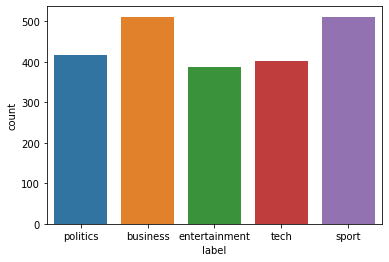

In [ ]:
sns.countplot(df.label)

From the counts of the different news article categories we can say that the data is not too much imbalanced.

Wordclouds

In [ ]:
def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='gray', 
        stopwords=set(STOPWORDS), 
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Whole together wordcloud

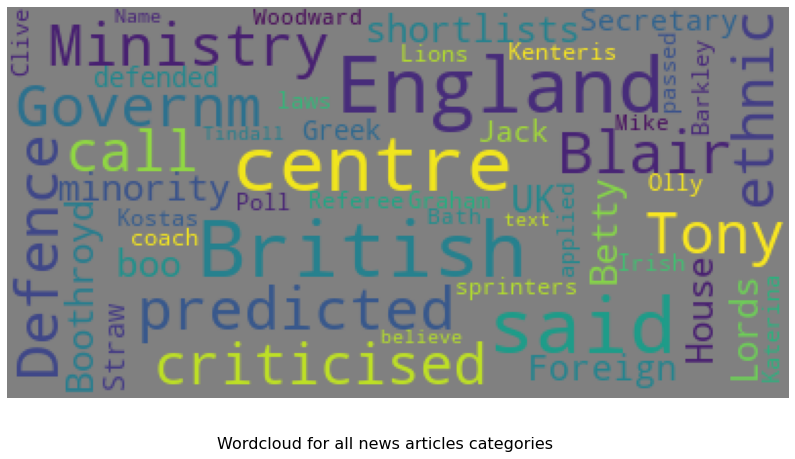

In [ ]:
build_wordcloud(df['text'], 'Wordcloud for all news articles categories')

Sport Wordcloud

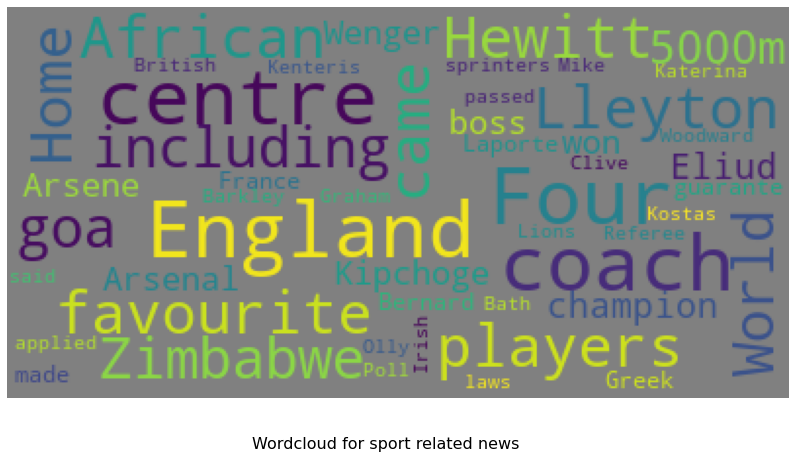

In [ ]:
sport_df = df[df['label']=='sport']
build_wordcloud(sport_df['text'], 'Wordcloud for sport related news')

Business Wordcloud

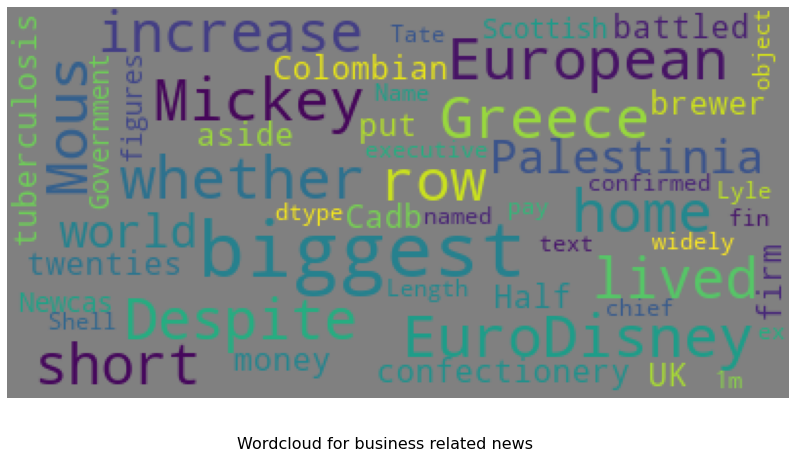

In [ ]:
business_df = df[df['label']=='business']
build_wordcloud(business_df['text'], 'Wordcloud for business related news')

Politics Wordcloud

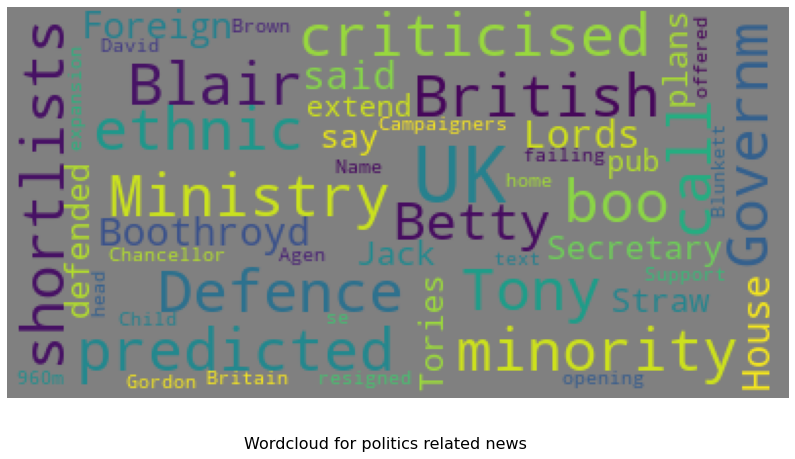

In [ ]:
politics_df = df[df['label']=='politics']
build_wordcloud(politics_df['text'], 'Wordcloud for politics related news')

Tech Wordcloud

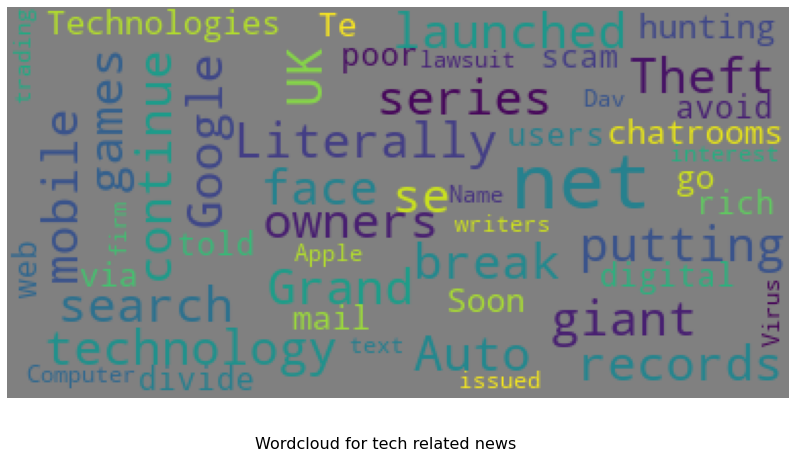

In [ ]:
tech_df = df[df['label']=='tech']
build_wordcloud(tech_df['text'], 'Wordcloud for tech related news')

Entertainment Worldcloud

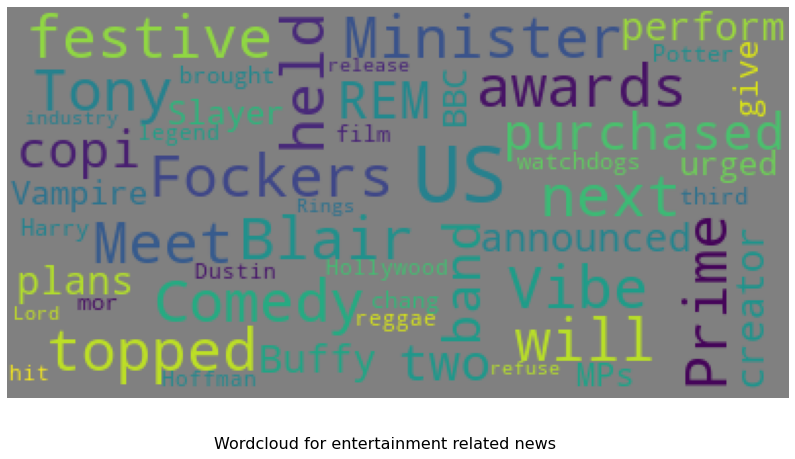

In [ ]:
entertainment_df = df[df['label']=='entertainment']
build_wordcloud(entertainment_df['text'], 'Wordcloud for entertainment related news')